<a href="https://colab.research.google.com/github/edwingarcia18/BIENES-RAICES-COLAB/blob/main/Copia_de_Copia_de_Bienes_Raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Procesamiento de datos
import pandas as pd   #Pandas para manipulación y análisis de datos.
import numpy as np    #Numpy para trabajar con distintas funciones matemáticas.
import seaborn as sns #Seaborn para la visualización de datos estadísticos.
import matplotlib.pyplot as plt #Matplotlib y Seaborn para visualización de datos.
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
# Sklearn.preprocessing preprocesar y transformar los datos antes de entrenar un modelo de aprendizaje automático.

#Set de entrenamiento
from sklearn.model_selection import train_test_split
#dividir los datos en conjuntos de entrenamiento y prueba antes de entrenar un modelo de aprendizaje automático.

#Validación de modelos
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

#Modelos de regresión lineal y Optimización
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extraer Datos


In [4]:
ruta_csv = '/content/drive/MyDrive/Talento Tech/1_housing_prices_dataset.csv'

# Cargar el archivo Excel
df = pd.read_csv(ruta_csv)
df.head()

,Size_sqft,Rooms,Location,Year_Built,Price
0,3232,7,Centro,1995,440819.86
1,3107,4,Suburbios,2015,572543.06
2,2153,4,Centro,2020,221662.57
3,3764,9,Rural,2003,1030807.93
4,1533,9,Rural,1998,196143.56


## Procesar Datos


In [5]:
#Vemos la cantidad de filas y columnas que tiene nuestro dataset
df.shape

(100, 5)

In [6]:
#Verificamos que no haya ningún dato null
df.isna().sum()

,0
Size_sqft,0
Rooms,0
Location,0
Year_Built,0
Price,0


## Explorar Datos

In [7]:
#Vemos la descripción del dataset
df.describe()

,Size_sqft,Rooms,Year_Built,Price
count,100.000000,100.000000,100.000000,1.000000e+02
mean,2838.390000,5.490000,1985.310000,5.689686e+05
std,1254.833635,2.653357,22.481281,3.275854e+05
min,599.000000,1.000000,1950.000000,5.649456e+04
25%,1706.250000,3.750000,1965.250000,3.115523e+05
50%,2855.000000,5.500000,1985.000000,5.103696e+05
75%,3772.750000,8.000000,2004.500000,7.077374e+05
max,4984.000000,9.000000,2022.000000,1.501619e+06


In [8]:
#Por cada columna del dataset, verificamos sus posibles valores
for column in df.columns:
    print('******' * 10)
    print(df[column].value_counts())

************************************************************
Size_sqft
2676    2
3232    1
2105    1
1060    1
4969    1
       ..
2792    1
1214    1
1044    1
3245    1
1652    1
Name: count, Length: 99, dtype: int64
************************************************************
Rooms
9    22
4    17
6    11
7    10
3    10
1     9
5     8
8     7
2     6
Name: count, dtype: int64
************************************************************
Location
Suburbios    35
Centro       34
Rural        31
Name: count, dtype: int64
************************************************************
Year_Built
1957    5
1970    4
2010    3
1958    3
2020    3
2003    3
1953    3
1986    3
1950    3
2008    3
1983    3
1993    3
1980    2
2004    2
2001    2
2015    2
1973    2
1959    2
1974    2
2018    2
2019    2
2021    2
1956    2
2017    2
1989    2
1976    2
1985    2
1999    2
1963    2
1997    1
2022    1
1960    1
1955    1
1981    1
2013    1
1951    1
1978    1
1990    1
1968    1
1962    1


In [9]:
#Verificamos que todas las columnas tengan el tipo de dato correcto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Size_sqft   100 non-null    int64  
 1   Rooms       100 non-null    int64  
 2   Location    100 non-null    object 
 3   Year_Built  100 non-null    int64  
 4   Price       100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


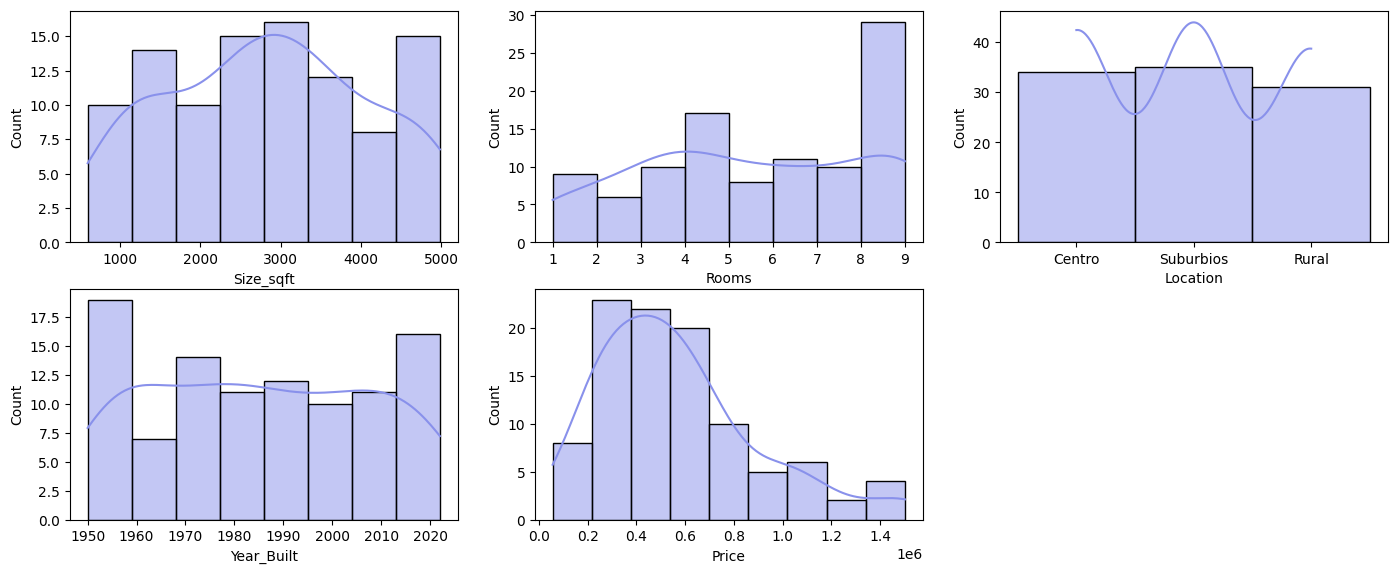

In [10]:
#Observamos la distribución de todas las columnas
fig = plt.figure(figsize=(17,21))
iter =0
for i in df.columns:
    ax = fig.add_subplot(6,3, iter+1)
    sns.histplot(data=df, x=df[i], color='#8991EB', ax=ax, kde=True)
    iter +=1
plt.show()

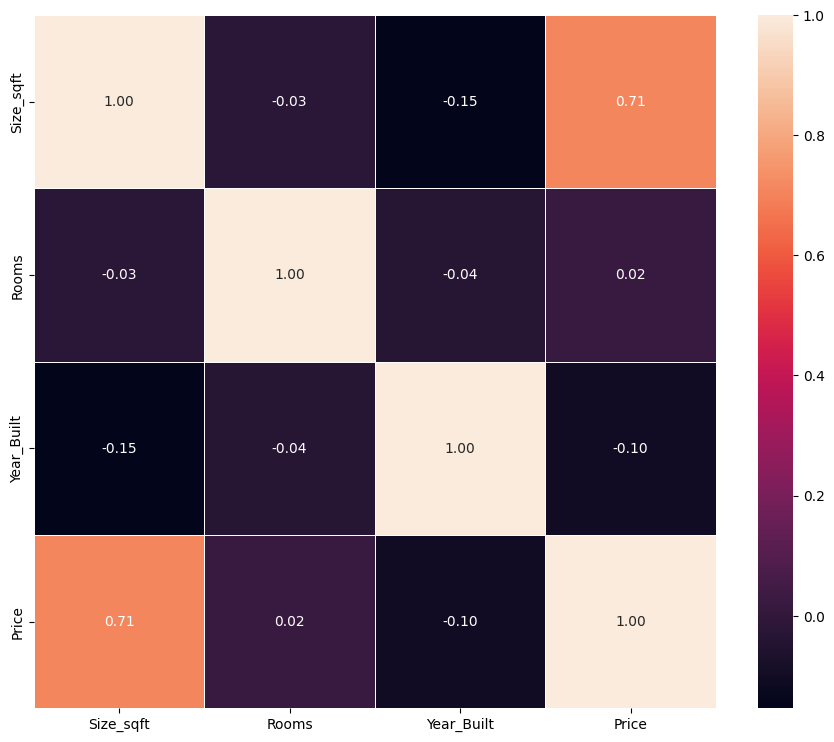

In [11]:
#Graficamos la correlación entre las columnas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot()
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', linewidth=0.5, ax=ax)
plt.show()

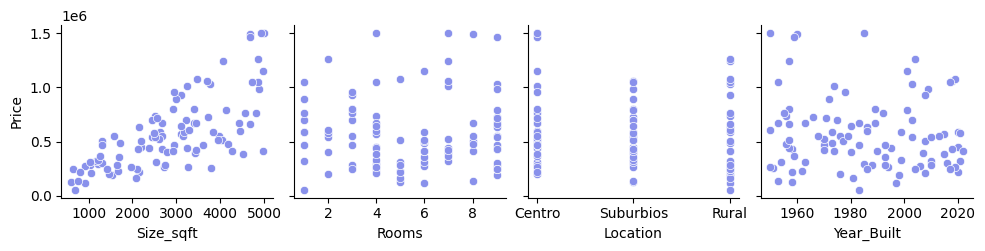

In [12]:
# Graficamos las variables independientes de la variable dependiente "Precio"
sns.pairplot(df, y_vars='Price', x_vars=['Size_sqft', 'Rooms', 'Location',
                                               'Year_Built',],
             plot_kws = {'color': '#8991EB'})

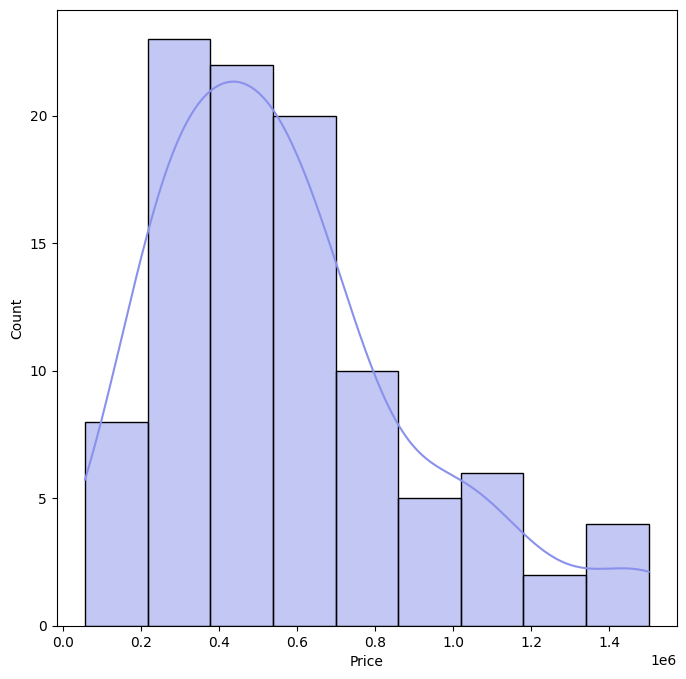

In [13]:
#Vemos la distribucion de la variable (precio)
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot()
sns.histplot(data=df, x='Price', color='#8991EB', ax=ax, kde=True )
plt.show()

In [14]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Aplicamos la transformación logarítmica a los diferentes datos
ft = FunctionTransformer(np.log1p, validate=True)
transformed_numeric = ft.transform(numeric_df)

# Gereramos el array de la información modificada
df_transformed = df.copy()
df_transformed[numeric_df.columns] = transformed_numeric
print(df_transformed)


    Size_sqft     Rooms   Location  Year_Built      Price
0    8.081166  2.079442     Centro    7.598900  12.996394
1    8.041735  1.609438  Suburbios    7.608871  13.257845
2    7.675082  1.609438     Centro    7.611348  12.308916
3    8.233503  2.302585      Rural    7.602900  13.845854
4    7.335634  2.302585      Rural    7.600402  12.186607
..        ...       ...        ...         ...        ...
95   8.042699  1.609438  Suburbios    7.591357  13.379747
96   8.451694  2.302585      Rural    7.579679  13.400139
97   7.847763  2.302585     Centro    7.586804  13.486982
98   6.694562  1.791759     Centro    7.580189  12.319617
99   7.410347  1.791759      Rural    7.597898  12.547910

[100 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [15]:
# Reconvertimos la información a Dataframe
df_transformer = pd.DataFrame(df_transformed, columns=df.columns)
df_transformer.head()

,Size_sqft,Rooms,Location,Year_Built,Price
0,8.081166,2.079442,Centro,7.598900,12.996394
1,8.041735,1.609438,Suburbios,7.608871,13.257845
2,7.675082,1.609438,Centro,7.611348,12.308916
3,8.233503,2.302585,Rural,7.602900,13.845854
4,7.335634,2.302585,Rural,7.600402,12.186607


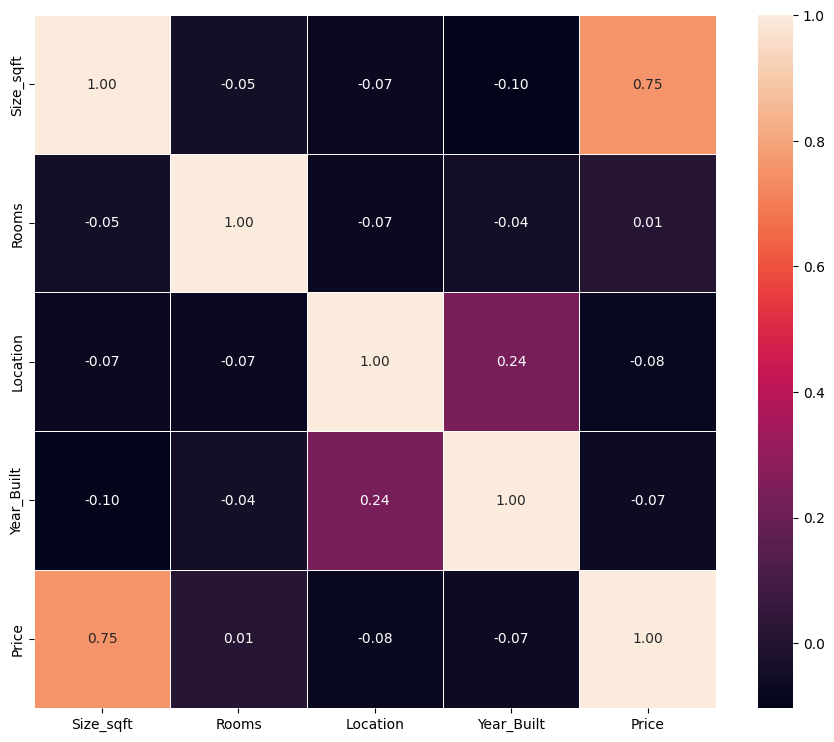

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transformer['Location'] = le.fit_transform(df_transformer['Location'])

# Ahora seleccionamos las columnas numéricas para la correlación
numeric_df_with_location = df_transformer.select_dtypes(include=['float64', 'int64'])

# Graficamos el heatmap de la correlación incluyendo 'Location' como categórica
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot()
sns.heatmap(numeric_df_with_location.corr(), annot=True, fmt='.2f', linewidth=0.5, ax=ax)
plt.show()

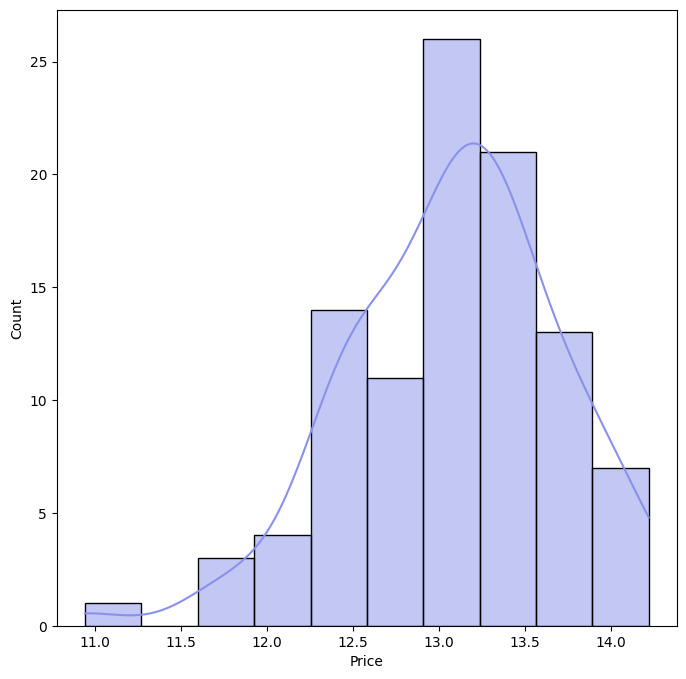

In [17]:
#Verificamos que la normalización de los datos frente a la variable "Precio" sea correcta
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot()
sns.histplot(data=df_transformer, x='Price',color='#8991EB', ax=ax, kde=True )
plt.show()

In [19]:
#creación de las variables X e y
X = df_transformer.drop('Price', axis = 1)
y = df_transformer['Price']

In [20]:
#set de entrenamiento de un 80% de entrenamiento y 20% de test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### Funciones de validación

In [21]:
# Definimos la estructura de como vamos a desplegar los análisis
df_valid_models = pd.DataFrame(columns=['model', 'r2_score','RMSE', 'MAE', 'MSE' ])
df_cross_validation = pd.DataFrame(columns=['model','cross_validation'])

In [22]:
# Definimos la función de validación y las formas en las que se van a declarar los outputs
def validation(df, model, name, X_test= X_test, y_test= y_test):
    y_hat = model.predict(X_test)

    r2= r2_score(y_test,y_hat)
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    mae = mean_absolute_error(y_test, y_hat)
    mse = mean_squared_error(y_test, y_hat)

    df_eval= pd.DataFrame({'model':[name], 'r2_score':[r2], 'RMSE':[rmse],
                           'MAE':[mae], 'MSE': [mse]})
    df_eval = pd.concat([df, df_eval])

    return df_eval, y_hat, r2
#******************************************************************************#
#Definimos la función de validación para cada modelo
def cross_validation (df, model, name, X=X, y=y):
    val_cross = cross_val_score(model, X, y, scoring='r2', cv=5).mean()

    df_val_cross = pd.DataFrame({'model':[name], 'cross_validation':[val_cross]})
    df_val_cross = pd.concat([df, df_val_cross])

    return df_val_cross, val_cross

### **LinearRegression**

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **DecisionTreeRegressor**

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### **RandomForestRegressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

## Validar modelos


In [26]:
df_valid_models, y_hat_lr, r2_lr = validation(df_valid_models, lr, 'LinearRegression')
df_cross_validation, cross_val_lr = cross_validation(df_cross_validation, lr, 'LinearRegression')

df_valid_models, y_hat_dtr, r2_dtr = validation(df_valid_models, dtr, 'DecisionTreeRegressor')
df_cross_validation, cross_val_dtr = cross_validation(df_cross_validation, dtr, 'DecisionTreeRegressor')

df_valid_models, y_hat_rfr, r2_rfr = validation(df_valid_models, rfr, 'RandomForestRegressor')
df_cross_validation, cross_val_rfr = cross_validation(df_cross_validation, rfr, 'RandomForestRegressor')

<ipython-input-22-857055dcc56b>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_eval = pd.concat([df, df_eval])
<ipython-input-22-857055dcc56b>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_val_cross = pd.concat([df, df_val_cross])


In [27]:
df_valid_models

,model,r2_score,RMSE,MAE,MSE
0,LinearRegression,0.593140,0.443006,0.389140,0.196255
0,DecisionTreeRegressor,0.187562,0.626012,0.472668,0.391891
0,RandomForestRegressor,0.382598,0.545722,0.445235,0.297813


In [28]:
df_cross_validation

,model,cross_validation
0,LinearRegression,0.376364
0,DecisionTreeRegressor,0.185482
0,RandomForestRegressor,0.359510


## Optimizar modelos


### Función de validación para modelos optimizados

In [29]:
# Utilizamos la función de RandomizedSearchCV para generar mayor precisión en los datos
from sklearn.model_selection import RandomizedSearchCV
def best_model_random(model, name):
    print(f'MODELO {name.upper()}:')
    print(f'Mejor modelo:', model.best_estimator_)
    print(f'Mejores parametros:', model.best_params_)
    print(f'Mejor score:', model.best_score_)

### **Search DecisionTreeRegressor**

In [30]:
# Utilizamos una busqueda de regrecion de decisiones de árbol para aumentar la precisión de los datos
hiperparameter_dtr = {
    'criterion':['squared_error', 'absolute_error'],
    'max_depth': [4,6,8,10,12,14,16],
    'min_samples_leaf': [4,6,8,10,12],
    'min_samples_split':[6,8,10,12],
    'max_features':['sqrt', 'log2', 'auto']}
search_dtr= DecisionTreeRegressor()
dtr_random= RandomizedSearchCV(search_dtr, hiperparameter_dtr, scoring='r2', cv=5)

In [31]:
dtr_random.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 6, 8, 10, 12, 14, 16],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [4, 6, 8, 10, 12],
                                        'min_samples_split': [6, 8, 10, 12]},
                   scoring='r2')

In [32]:
#Vemos cual es el mejor modelo
best_model_random(dtr_random, 'dtr_random')

MODELO DTR_RANDOM:
Mejor modelo: DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=6)
Mejores parametros: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error'}
Mejor score: 0.28205059389594045


In [33]:
#Entrenamos el modelo con los mejores parámetros
search_dtr= dtr_random.best_estimator_
search_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=6)

### **Search_RandomForestRegressor**

In [34]:
hiperparameter_rfr = {
    'n_estimators':[150,200,250,300,350],
    'max_depth': [4,6,8,10,12,14,16],
    'min_samples_leaf': [4,6,8,10,12],
    'min_samples_split':[6,8,10,12]}

search_rfr= RandomForestRegressor()
rfr_random = RandomizedSearchCV(search_rfr, hiperparameter_rfr, scoring='r2', cv=5)

In [35]:
rfr_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12, 14, 16],
                                        'min_samples_leaf': [4, 6, 8, 10, 12],
                                        'min_samples_split': [6, 8, 10, 12],
                                        'n_estimators': [150, 200, 250, 300,
                                                         350]},
                   scoring='r2')

In [36]:
#Vemos cual es el mejor modelo
best_model_random(rfr_random, 'rfr_random')

MODELO RFR_RANDOM:
Mejor modelo: RandomForestRegressor(max_depth=14, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=250)
Mejores parametros: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 14}
Mejor score: 0.4031341461999503


In [37]:
#Entrenamos el modelo con los mejores parámetros
search_rfr= rfr_random.best_estimator_
search_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=250)

## Validar modelos optimizados


In [38]:
df_valid_models,y_hat_search_dtr, r2_search_dtr = validation(df_valid_models, search_dtr, 'Search_DecisionTreeRegressor')
df_cross_validation, cross_val_search_dtr = cross_validation(df_cross_validation, search_dtr, 'Search_DecisionTreeRegressor')

df_valid_models, y_hat_search_rfr, r2_search_rfr = validation(df_valid_models, search_rfr, 'Search_RandomForestRegressor')
df_cross_validation, cross_val_search_rfr = cross_validation(df_cross_validation, search_rfr, 'Search_RandomForestRegressor')

In [ ]:
df_valid_models

,model,r2_score,RMSE,MAE,MSE
0,LinearRegression,0.593140,0.443006,0.389140,0.196255
0,DecisionTreeRegressor,0.187562,0.626012,0.472668,0.391891
0,RandomForestRegressor,0.382598,0.545722,0.445235,0.297813
0,Search_DecisionTreeRegressor,0.148437,0.640909,0.553410,0.410764
0,Search_RandomForestRegressor,0.668905,0.399635,0.333404,0.159708


In [39]:
df_cross_validation

,model,cross_validation
0,LinearRegression,0.376364
0,DecisionTreeRegressor,0.185482
0,RandomForestRegressor,0.359510
0,Search_DecisionTreeRegressor,0.192662
0,Search_RandomForestRegressor,0.415169


## Usar Modelo


Ahora vamos a usar el mejor modelo creado (LinearRegression) para predecir los siguientes datos de prueba

In [40]:
#Datos que le debemos dar al modelo excepto la variable de salida (price)
df_transformer.head()

,Size_sqft,Rooms,Location,Year_Built,Price
0,8.081166,2.079442,0,7.598900,12.996394
1,8.041735,1.609438,2,7.608871,13.257845
2,7.675082,1.609438,0,7.611348,12.308916
3,8.233503,2.302585,1,7.602900,13.845854
4,7.335634,2.302585,1,7.600402,12.186607


In [41]:
#Creamos los datos de prueba
df_prueba = pd.DataFrame({"Size_sqft":[3500], "Rooms":[6], "Location":[1],
                         "Year_Built":[2018]})
df_prueba

,Size_sqft,Rooms,Location,Year_Built
0,3500,6,1,2018


Se debe hacer la misma transformación logarítmica que se hizo anteriormente para que el modelo pueda predecir el precio.

In [42]:
prueba_transform= ft.transform(df_prueba)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [43]:
df_prueba_transform = pd.DataFrame(prueba_transform, columns=df_prueba.columns)
df_prueba_transform

,Size_sqft,Rooms,Location,Year_Built
0,8.160804,1.94591,0.693147,7.610358


In [44]:
#finalmente le damos al modelo los datos para predecir el precio
y_hat_prueba= search_rfr.predict(df_prueba_transform)
y_hat_prueba

array([13.43803236])

In [45]:
#Aplicamos np.expm1 para obtener el precio real
print("El precio para una casa con las caracteristicas dadas es:", np.expm1(y_hat_prueba))

El precio para una casa con las caracteristicas dadas es: [685587.1468395]
